In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interpolate

sns.set()

In [7]:
# create signal
srate = 1000  # Hz
time = np.linspace(0, 3, 3000)
n = len(time)
p = 15  # random time points that will be used to linearly interpolate across them

# noise level, measured in std
noiseamp = 5

# amplitude modulator and noise level
amp = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * 30)
amp

array([ 4.35188152,  4.39270649,  4.43353146, ..., 10.10114018,
       10.10114018, 10.10114018])

In [9]:
noise = noiseamp * np.random.randn(n)
signal = amp + noise

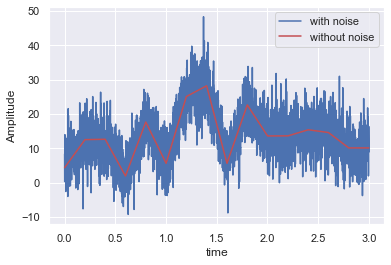

In [14]:
plt.plot(time, signal)
plt.plot(time, amp, 'r')
plt.legend(['with noise', 'without noise'], loc='best')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

In [17]:
# initialize filtered signal vector
# setting filtsig=signal will remove the edge points problem and set it to
# the starting/ending points instead
filtsig = np.zeros(len(signal))

# implement running mean filter
# making k bigger will give smoother lines
k = 20

for i in range(k, n - k):
    filtsig[i] = np.mean(signal[i - k : i + k])

filtsig

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
# compute window size in ms
windowsize = 1000 * (k * 2 + 1) / srate
print(windowsize)

41.0


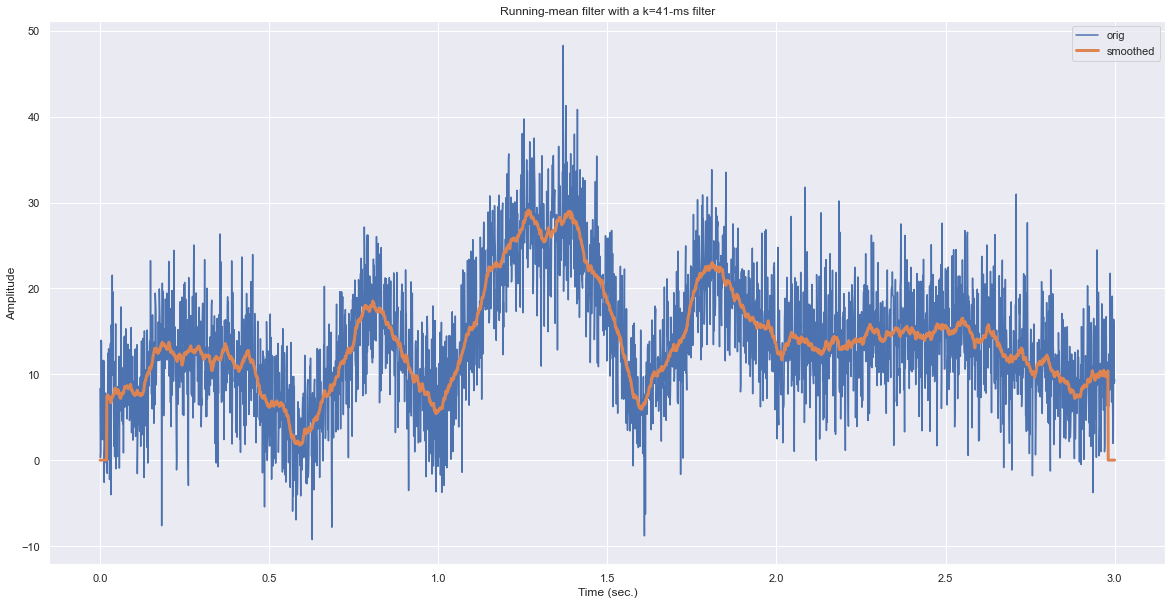

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(time, signal, label='orig')
plt.plot(time, filtsig, label='smoothed', linewidth=3)
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()